### Building up a Feed-Forward Neural Network from scratch using the Titanic data set.

Then using Backpropagation, the weights of the layers get updated and a plot with the evolution of the loss function is displayed.


In [207]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler


In [208]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
X=data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y_titanic=df.Survived

### Scale the data.

In [19]:
trans = ColumnTransformer([
    (make_pipeline(SimpleImputer(strategy='median', missing_values=np.nan), 
                                       MinMaxScaler(), KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='quantile')), ['Age', 'Fare']),
    (OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Pclass','Sex']),
    (make_pipeline(SimpleImputer(strategy='most_frequent',missing_values=np.nan), OneHotEncoder(sparse=False, handle_unknown='ignore')), ['Embarked'])
    #('standardrise', StandardScaler(), ['Pclass', 'Age', 'Fare', 'Embarked'])
])

trans.fit(X)                    
Xtrain = trans.transform(X) 
Xtrain

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


array([[0., 1., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 2., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

### Color it, so we can actually get some clusters.

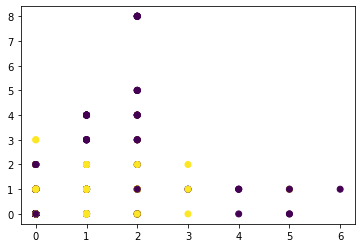

In [190]:
plt.scatter(Xtrain[:,17], Xtrain[:,18], c=y_titanic)
#c is the color parameter, and y is an array of 1s and 0s

### Implement a sigmoid function (eventually will serve as the activation functions) that can take in numpy arrays
- Just a quick note the make: ANNs are actually used primarily as a *supervised learning* method (well, at least in this class)

In [22]:
def sigmoid(x):
    """sigmoid function that accepts numpy arrays"""
    return 1.0 / (1.0 + np.e ** -x)

### Test it!

In [24]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)
#if the results of our sigmoid function are within 2 decimals rounding from the expected results,
#then we know it's calculating correctly

X, y = Xtrain, y_titanic
X.shape, y_titanic.shape

#because it doesn't return any errors, we know it works (i.e. the assert didn't fail)

((891, 19), (891,))

### Use numpy to add an extra column to include bias.

In [25]:
X = np.hstack([X, np.ones((X.shape[0], 1))])
#hstack does the same thing as pandas concat, but horizontally
#attaching a column of ones to the input data, X.
X[:5]

#we can now treat the bias as an additional input

array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        1., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
        0., 0., 1., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 1., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        1., 0., 0., 1.]])

In [26]:
X.shape

(891, 20)

### We also need weights in our ANN.
- **Create the weights of the network where each ...**

In [147]:
# Creating random weights!

weights = [np.random.normal(0.5,1,(19, 2)), np.random.normal(0.5,1,(3, 1))]


#it's really important that the weights are in this shape!!!
#i.e. the first element in the tuple (3) is the number of input weights (X1, X2, bias)
#and the second element in the tuple (2 or 1) represents the number of neurons in the first
#and second layers, respectively.

### Implement the Feed-Forward Function.

In [148]:
def feed_forward(X, weights):
    """
    1. calculate the dot product of X 
    (shape of (50,3))
       and the weights of the first layer 
    (shape of (3, 2))
    5
    this results in an output shape of (50, 2)
    
    2. apply the sigmoid function on the result
    (applying the sigmoid function on a 50x2 matrix outputs the same shape.
    ..because the sigmoid function is applied to each value)
    
    3. append an extra 1 for the bias to the result (see Ex.7)
    (this results in a 50x3 matrix...cause we're essentially just adding
    an extra column)
    
    4. calculate the dot product of X (from step 3)
    (shape of (50, 3))
       and the weights of the second layer
    (shape of (3, 1))
    
    this results in an output shape of (50, 1)
       
    5. apply the sigmoid function on the result
    (so we want to return the result of step 2 and step 5)
    (in other words, the result of the sigmoid function of the first layer and
    the results of the sigmoid fucntion from the second (final) layer)
    
    6. return all intermediate results
    """
    
    d1 = np.dot(X, weights[0]) #step 1
    output1 = sigmoid(d1) #step 2
    input2 = np.hstack([output1, np.ones((output1.shape[0], 1))]) #step 3
    d2 = np.dot(input2, weights[1]) #step 4
    output2 = sigmoid(d2) #step 5
    
    return output1, output2 #step 6

In [149]:
feed_forward(Xtrain, weights)

(array([[0.8509118 , 0.9942001 ],
        [0.84774758, 0.45501251],
        [0.81699446, 0.98526134],
        ...,
        [0.99936381, 0.99860346],
        [0.93747269, 0.7817201 ],
        [0.74371309, 0.99813166]]),
 array([[0.14915797],
        [0.253087  ],
        [0.15860481],
        [0.11882293],
        [0.12453331],
        [0.13546728],
        [0.13276377],
        [0.11817916],
        [0.121123  ],
        [0.4255205 ],
        [0.12958225],
        [0.12040955],
        [0.14995518],
        [0.11718382],
        [0.20551809],
        [0.18833776],
        [0.13457962],
        [0.13265429],
        [0.12214651],
        [0.27311332],
        [0.12534177],
        [0.13265429],
        [0.28701726],
        [0.11765164],
        [0.1188355 ],
        [0.11723011],
        [0.24316259],
        [0.11757168],
        [0.14045435],
        [0.12453331],
        [0.15310353],
        [0.15149966],
        [0.18726299],
        [0.17620586],
        [0.13362819],
        [0.

### Let's run the code  / ANN F-F function.

In [150]:
out1, out2 = feed_forward(Xtrain, weights)

In [151]:
out1.shape, out2.shape

((891, 2), (891, 1))

In [152]:
def get_accuracy(output2,ytrue):
    acc = sum(ytrue == output2.round().astype(np.int64))
    return acc[0]/len(ytrue)
out2.shape, y_titanic.shape

((891, 1), (891, 1))

In [153]:
y_titanic

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [154]:
get_accuracy(out2[:50],y_titanic[:50])

0.56

In [155]:
Xtrain[:5]

array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
        0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        1., 0., 0.]])

In [156]:
out2[:5]

array([[0.14915797],
       [0.253087  ],
       [0.15860481],
       [0.11882293],
       [0.12453331]])

Implement a log-loss function:

In [47]:
def log_loss(ytrue, ypred):
    loss = -(ytrue*np.log(ypred)+(1-ytrue)*np.log(1-ypred))
    return loss

testing it:

In [157]:
ytrue = np.array([0.0, 0.0, 1.0, 1.0])
ypred = np.array([0.01, 0.99, 0.01, 0.99])
expected = np.array([0.01, 4.61, 4.61, 0.01])
assert np.all(log_loss(ytrue, ypred).round(2) == expected)

## GOAL: Implement the first part of the backpropagation algorithm – modify the weights of the output layer:
1. Initialize the weights (**Step A**)
2. Calculate the output of both layers for each data point  (**Step B**)
3. Calculate the loss for each data point (**Step C**)
4. Modify each weight of the output layer by -sigmoid'(output) * loss * hidden_output (**Step D**)
5. Apply the weight modification for each data point separately. (**Step E**)

Execute the function once.

In [158]:
weights[0], weights[1]  #step A

(array([[-0.98077718,  0.41664358],
        [-0.0552081 , -0.15838345],
        [ 1.47274243,  1.83210113],
        [ 0.03826906,  0.15750778],
        [-0.77572873,  0.94541416],
        [ 0.48307583,  0.39518215],
        [-0.18257929,  1.81877316],
        [ 0.48633207, -0.30990673],
        [-1.66970918, -0.41033326],
        [ 1.53774663,  2.13808774],
        [-1.40494674,  1.40655934],
        [-1.30162389,  1.13303224],
        [ 0.50891212, -0.70782973],
        [ 0.72513017,  0.32369692],
        [ 0.01358342, -0.7177759 ],
        [ 0.9448378 ,  2.04659097],
        [ 1.86095994,  3.54043201],
        [ 1.52190721,  0.86231189],
        [ 1.28824105, -0.64009456]]),
 array([[-1.82046007],
        [-1.21153535],
        [ 1.01233896]]))

In [159]:
# step B
print(y_titanic.shape , out2.shape)

(891, 1) (891, 1)


In [160]:
#print(y)

In [161]:
#y_titanic = np.array(y_titanic).reshape(891,1)

In [162]:
#print(y)
assert y_titanic.shape == out2.shape

In [163]:
#calculate loss
log_loss(y_titanic, out2)     #ytrue corresponds to y from above # ypred to out2
#calcualte error
error = (out2-y_titanic)*log_loss(y_titanic, out2)

In [164]:
log_loss(y_titanic, out2)  

array([[0.16152879],
       [1.37402196],
       [1.84133961],
       [2.1301209 ],
       [0.13299817],
       [0.14556612],
       [0.14244387],
       [0.12576637],
       [2.11094873],
       [0.85444216],
       [2.04343947],
       [2.1168564 ],
       [0.16246621],
       [0.12463827],
       [0.23006507],
       [1.66951835],
       [0.1445399 ],
       [2.02000887],
       [0.13027557],
       [1.29786849],
       [0.13392206],
       [2.02000887],
       [1.24821292],
       [2.14002725],
       [0.12651096],
       [2.14361654],
       [0.27860684],
       [0.12507771],
       [1.96287277],
       [0.13299817],
       [0.16617682],
       [1.8871719 ],
       [1.6752413 ],
       [0.19383461],
       [0.14344112],
       [0.13033318],
       [1.41402495],
       [0.16246621],
       [0.14328896],
       [1.013722  ],
       [0.13962859],
       [0.15307559],
       [0.18421134],
       [1.42197339],
       [1.24821292],
       [0.13299817],
       [0.13590977],
       [1.675

In [165]:
def backpro(weights,output1,output2,ytrue,X_input, LR_O = 0.05, LR_H = 50):  #separate learning rates for outer and inner weights.
    wH =weights[0]
    wO =weights[1]
    ytrue = ytrue.reshape(-1, 1)
    error = (output2-ytrue)*log_loss(ytrue, output2)
    sig_deriv = output2*(1-output2)
    y_grad = sig_deriv*error
    #wH.reshape(19,2)
    print(wH.shape)
    print(wH.size)
    print(wH)

    output1B = np.hstack([output1,np.ones((output1.shape[0],1))])
    
    delta_wo = np.dot(-y_grad.T,output1B)*LR_O
    wO_new = wO+delta_wo.T
    sig_deriv_2 = output1 * (1-output1)

    H_grad = sig_deriv_2  * np.dot(y_grad , wO_new[:2].T)
    delta_wH = np.dot(-H_grad.T,X_input)*LR_H
    delta_wH = delta_wH.T
    print(delta_wH.shape)
    print(delta_wH.size)
    print(delta_wH)
    #delta_wH.reshape(20,2, order='F')
    #delta_wH = np.resize(delta_wH,(20,2))
    wH_new = wH+delta_wH
    
    return wH_new, wO_new 

In [166]:
wH_new, wO_new = backpro(weights,out1,out2,y_titanic,Xtrain)

(19, 2)
38
[[-0.98077718  0.41664358]
 [-0.0552081  -0.15838345]
 [ 1.47274243  1.83210113]
 [ 0.03826906  0.15750778]
 [-0.77572873  0.94541416]
 [ 0.48307583  0.39518215]
 [-0.18257929  1.81877316]
 [ 0.48633207 -0.30990673]
 [-1.66970918 -0.41033326]
 [ 1.53774663  2.13808774]
 [-1.40494674  1.40655934]
 [-1.30162389  1.13303224]
 [ 0.50891212 -0.70782973]
 [ 0.72513017  0.32369692]
 [ 0.01358342 -0.7177759 ]
 [ 0.9448378   2.04659097]
 [ 1.86095994  3.54043201]
 [ 1.52190721  0.86231189]
 [ 1.28824105 -0.64009456]]
(19, 2)
38
[[ 70.10006421  50.31126861]
 [ 67.85526025  60.13834606]
 [ 85.12896523  45.11529876]
 [ 53.32550309  94.92491303]
 [ 55.30359017   7.80367006]
 [ 34.20636084   6.24596816]
 [ 81.73079734  23.6307927 ]
 [ 21.18001383  41.29062835]
 [ 83.98903061 171.51876719]
 [ 75.64344493 185.08212995]
 [ 72.88829727  27.58398663]
 [127.87805059  37.82370988]
 [207.39121833 203.543419  ]
 [ 69.01857446  46.94640745]
 [ 96.11878182 225.44658113]
 [ 40.87451127   5.98600856]


<AxesSubplot:>

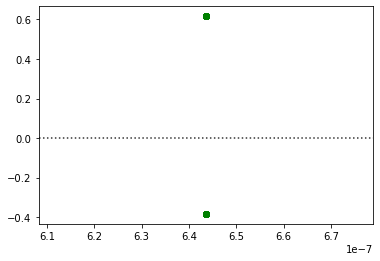

In [204]:
x = out2
y = y_titanic
sns.residplot(x=x, y=y, color="g")
# y_titanic is 0's and 1's

In [167]:
new_weights = [wH_new, wO_new]

In [168]:
new_weights

[array([[ 69.11928704,  50.72791218],
        [ 67.80005216,  59.97996261],
        [ 86.60170766,  46.9473999 ],
        [ 53.36377215,  95.08242081],
        [ 54.52786144,   8.74908422],
        [ 34.68943667,   6.64115031],
        [ 81.54821805,  25.44956587],
        [ 21.66634589,  40.98072161],
        [ 82.31932143, 171.10843393],
        [ 77.18119155, 187.22021769],
        [ 71.48335053,  28.99054597],
        [126.5764267 ,  38.95674212],
        [207.90013044, 202.83558927],
        [ 69.74370462,  47.27010437],
        [ 96.13236524, 224.72880523],
        [ 41.81934908,   8.03259953],
        [141.27745963,  22.59766877],
        [ 59.99881743,  94.90585426],
        [ 65.26425952, 170.44529931]]),
 array([[0.98420496],
        [1.80267352],
        [4.23524754]])]

In [172]:
ACC_VEC = []
LOSS_VEC = []
for i in range(500):
    
    out1, out2 =  feed_forward(Xtrain, weights)
    
    ACC_VEC.append(get_accuracy(out2,y_titanic))
    LOSS_VEC.append(sum(log_loss(y_titanic, out2))[0])
    new_weights = backpro(weights,out1,out2,y_titanic,Xtrain)
    weights = new_weights

(19, 2)
38
[[-0.98077718  0.41664358]
 [-0.0552081  -0.15838345]
 [ 1.47274243  1.83210113]
 [ 0.03826906  0.15750778]
 [-0.77572873  0.94541416]
 [ 0.48307583  0.39518215]
 [-0.18257929  1.81877316]
 [ 0.48633207 -0.30990673]
 [-1.66970918 -0.41033326]
 [ 1.53774663  2.13808774]
 [-1.40494674  1.40655934]
 [-1.30162389  1.13303224]
 [ 0.50891212 -0.70782973]
 [ 0.72513017  0.32369692]
 [ 0.01358342 -0.7177759 ]
 [ 0.9448378   2.04659097]
 [ 1.86095994  3.54043201]
 [ 1.52190721  0.86231189]
 [ 1.28824105 -0.64009456]]
(19, 2)
38
[[ 70.10006421  50.31126861]
 [ 67.85526025  60.13834606]
 [ 85.12896523  45.11529876]
 [ 53.32550309  94.92491303]
 [ 55.30359017   7.80367006]
 [ 34.20636084   6.24596816]
 [ 81.73079734  23.6307927 ]
 [ 21.18001383  41.29062835]
 [ 83.98903061 171.51876719]
 [ 75.64344493 185.08212995]
 [ 72.88829727  27.58398663]
 [127.87805059  37.82370988]
 [207.39121833 203.543419  ]
 [ 69.01857446  46.94640745]
 [ 96.11878182 225.44658113]
 [ 40.87451127   5.98600856]


(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932143 171.10843393]
 [ 77.18119155 187.22021769]
 [ 71.48335053  28.99054597]
 [126.5764267   38.95674212]
 [207.90013044 202.83558927]
 [ 69.74370462  47.27010437]
 [ 96.13236524 224.72880523]
 [ 41.81934908   8.03259953]
 [141.27745963  22.59766877]
 [ 59.99881743  94.90585426]
 [ 65.26425952 170.44529931]]
(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932

(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932143 171.10843393]
 [ 77.18119155 187.22021769]
 [ 71.48335053  28.99054597]
 [126.5764267   38.95674212]
 [207.90013044 202.83558927]
 [ 69.74370462  47.27010437]
 [ 96.13236524 224.72880523]
 [ 41.81934908   8.03259953]
 [141.27745963  22.59766877]
 [ 59.99881743  94.90585426]
 [ 65.26425952 170.44529931]]
(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932

(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932143 171.10843393]
 [ 77.18119155 187.22021769]
 [ 71.48335053  28.99054597]
 [126.5764267   38.95674212]
 [207.90013044 202.83558927]
 [ 69.74370462  47.27010437]
 [ 96.13236524 224.72880523]
 [ 41.81934908   8.03259953]
 [141.27745963  22.59766877]
 [ 59.99881743  94.90585426]
 [ 65.26425952 170.44529931]]
(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932

(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932143 171.10843393]
 [ 77.18119155 187.22021769]
 [ 71.48335053  28.99054597]
 [126.5764267   38.95674212]
 [207.90013044 202.83558927]
 [ 69.74370462  47.27010437]
 [ 96.13236524 224.72880523]
 [ 41.81934908   8.03259953]
 [141.27745963  22.59766877]
 [ 59.99881743  94.90585426]
 [ 65.26425952 170.44529931]]
(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932

(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932143 171.10843393]
 [ 77.18119155 187.22021769]
 [ 71.48335053  28.99054597]
 [126.5764267   38.95674212]
 [207.90013044 202.83558927]
 [ 69.74370462  47.27010437]
 [ 96.13236524 224.72880523]
 [ 41.81934908   8.03259953]
 [141.27745963  22.59766877]
 [ 59.99881743  94.90585426]
 [ 65.26425952 170.44529931]]
(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932

(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932143 171.10843393]
 [ 77.18119155 187.22021769]
 [ 71.48335053  28.99054597]
 [126.5764267   38.95674212]
 [207.90013044 202.83558927]
 [ 69.74370462  47.27010437]
 [ 96.13236524 224.72880523]
 [ 41.81934908   8.03259953]
 [141.27745963  22.59766877]
 [ 59.99881743  94.90585426]
 [ 65.26425952 170.44529931]]
(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932

(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932143 171.10843393]
 [ 77.18119155 187.22021769]
 [ 71.48335053  28.99054597]
 [126.5764267   38.95674212]
 [207.90013044 202.83558927]
 [ 69.74370462  47.27010437]
 [ 96.13236524 224.72880523]
 [ 41.81934908   8.03259953]
 [141.27745963  22.59766877]
 [ 59.99881743  94.90585426]
 [ 65.26425952 170.44529931]]
(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932

(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932143 171.10843393]
 [ 77.18119155 187.22021769]
 [ 71.48335053  28.99054597]
 [126.5764267   38.95674212]
 [207.90013044 202.83558927]
 [ 69.74370462  47.27010437]
 [ 96.13236524 224.72880523]
 [ 41.81934908   8.03259953]
 [141.27745963  22.59766877]
 [ 59.99881743  94.90585426]
 [ 65.26425952 170.44529931]]
(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932

(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932143 171.10843393]
 [ 77.18119155 187.22021769]
 [ 71.48335053  28.99054597]
 [126.5764267   38.95674212]
 [207.90013044 202.83558927]
 [ 69.74370462  47.27010437]
 [ 96.13236524 224.72880523]
 [ 41.81934908   8.03259953]
 [141.27745963  22.59766877]
 [ 59.99881743  94.90585426]
 [ 65.26425952 170.44529931]]
(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [

(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932143 171.10843393]
 [ 77.18119155 187.22021769]
 [ 71.48335053  28.99054597]
 [126.5764267   38.95674212]
 [207.90013044 202.83558927]
 [ 69.74370462  47.27010437]
 [ 96.13236524 224.72880523]
 [ 41.81934908   8.03259953]
 [141.27745963  22.59766877]
 [ 59.99881743  94.90585426]
 [ 65.26425952 170.44529931]]
(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [

(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932143 171.10843393]
 [ 77.18119155 187.22021769]
 [ 71.48335053  28.99054597]
 [126.5764267   38.95674212]
 [207.90013044 202.83558927]
 [ 69.74370462  47.27010437]
 [ 96.13236524 224.72880523]
 [ 41.81934908   8.03259953]
 [141.27745963  22.59766877]
 [ 59.99881743  94.90585426]
 [ 65.26425952 170.44529931]]
(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932

(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932143 171.10843393]
 [ 77.18119155 187.22021769]
 [ 71.48335053  28.99054597]
 [126.5764267   38.95674212]
 [207.90013044 202.83558927]
 [ 69.74370462  47.27010437]
 [ 96.13236524 224.72880523]
 [ 41.81934908   8.03259953]
 [141.27745963  22.59766877]
 [ 59.99881743  94.90585426]
 [ 65.26425952 170.44529931]]
(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [

(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932143 171.10843393]
 [ 77.18119155 187.22021769]
 [ 71.48335053  28.99054597]
 [126.5764267   38.95674212]
 [207.90013044 202.83558927]
 [ 69.74370462  47.27010437]
 [ 96.13236524 224.72880523]
 [ 41.81934908   8.03259953]
 [141.27745963  22.59766877]
 [ 59.99881743  94.90585426]
 [ 65.26425952 170.44529931]]
(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [

(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932143 171.10843393]
 [ 77.18119155 187.22021769]
 [ 71.48335053  28.99054597]
 [126.5764267   38.95674212]
 [207.90013044 202.83558927]
 [ 69.74370462  47.27010437]
 [ 96.13236524 224.72880523]
 [ 41.81934908   8.03259953]
 [141.27745963  22.59766877]
 [ 59.99881743  94.90585426]
 [ 65.26425952 170.44529931]]
(19, 2)
38
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(19, 2)
38
[[ 69.11928704  50.72791218]
 [ 67.80005216  59.97996261]
 [ 86.60170766  46.9473999 ]
 [ 53.36377215  95.08242081]
 [ 54.52786144   8.74908422]
 [ 34.68943667   6.64115031]
 [ 81.54821805  25.44956587]
 [ 21.66634589  40.98072161]
 [ 82.31932

In [173]:
max(ACC_VEC), min(LOSS_VEC)

(0.6161616161616161, 596.4284289772019)

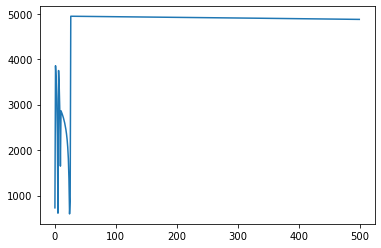

In [174]:
import matplotlib.pyplot as plt
plt.plot(LOSS_VEC)

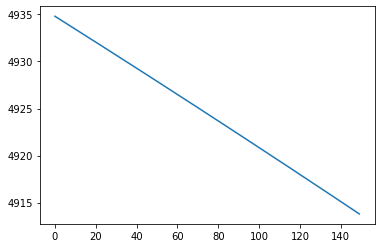

In [175]:
plt.plot(LOSS_VEC[100:250])

<AxesSubplot:>

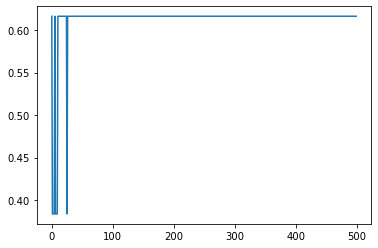

In [194]:
import seaborn as sn
sns.lineplot(data=ACC_VEC)

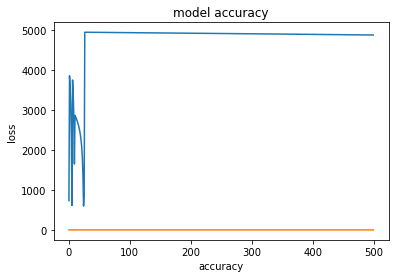

In [202]:

plt.plot(LOSS_VEC)
plt.plot(ACC_VEC)
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('accuracy')
plt.show()